Vicente De Leon

Deep Learning Principles: Homework 6

UID: 2001014594

# Dependencies

In [ ]:
!pip install -q -U tensorflow

In [20]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
#from keras.utils.vis_utils import plot_model -> I changed this code. Please see below
from tensorflow.keras.layers import Dense
import matplotlib
import numpy as np
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
%matplotlib inline

The code `from keras.utils.vis_utils import plot_model` was changed to the below codes. Please run those two (both works). The above code seems to have some issues and its not working correctlty, reason why I decided to change it.

In [5]:
from tensorflow.keras.utils import plot_model

Or

In [6]:
from keras.utils import plot_model

The following code generates some synthetic data (it basically generates two classes red and blue). The function gencircle is used to create on circles with different radii. First, it generates 1000 points with a radius of 0.1 and assigns a label of 0 to these points (red class). Then it generates another 1000 points with a radius of 0.5 and assigns a label of 1 to those points (blue class). Finally, we can see the scatter plot of the data. Since we are generating our own data, we don't need a preprocessing step. Our data is ready to use.

# Data Generation and Data Splitting

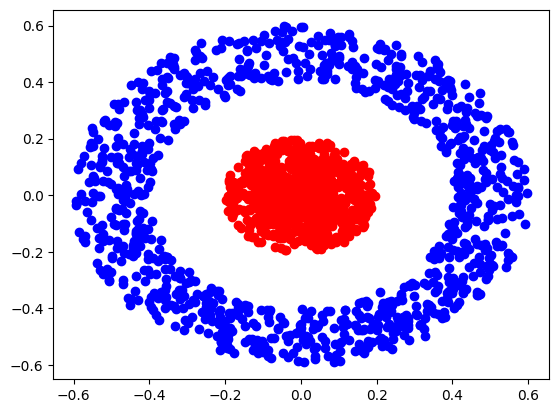

In [8]:
PI=np.pi
PI2=2*PI

def gencircle(rc,rr=0.1,offset=[0,0],num=100,label=0):
    #taken from https://qiita.com/xiangze750/items/1d024c8536d128c3ceae
    c=[]
    for i in range(num):
        r=rc+np.random.uniform(-rr,rr,1)
        th=np.random.uniform(0,PI2,1)
        c.append([r*np.sin(th)+offset[0],r*np.cos(th)+offset[1]])
    return np.c_[np.array(c).reshape(num,2),np.repeat(label,num)]

X=np.r_[gencircle(0.1,0.1,num=1000,label=0),gencircle(0.5,0.1,num=1000,label=1)][:,0:2]

plt.scatter(X[0:1000,0],X[0:1000,1],color="red")
plt.scatter(X[1000:2000,0],X[1000:2000,1],color="blue")

Lets create the Y labels now that we already have the X features. The line code `y = y = np.concatenate((np.zeros(1000), np.ones(1000)))` is used to create an array of 1000 zeros and a array of 1000 ones. Concatenate is applied to link both of these arrays in order to return an array with 2000 shape -> y labels.

Just by looking at the plot, we can see that function `gencircle` generates data that is not linearly separable. If we try to do something like drawing a line to separate the 2 classes, we will end up getting misclassified results.

In [9]:
# X features: X=np.r_[gencircle(0.1,0.1,num=1000,label=0),gencircle(0.5,0.1,num=1000,label=1)][:,0:2]

y = y = np.concatenate((np.zeros(1000), np.ones(1000)))

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [11]:
X_train.shape

(1600, 2)

# Logistic Regression Model

We are going to be using Keras API for this. It is important to remember that Logistic Regression uses Sigmoid Activation function instead of ReLU acitvation function like other deep learning models. For this model architecture, I am using Applied Machine Learning basic coursework material and Deep Learning Principles Homework 2 training steps.

`Sigmoid Activation Function` Will always returns a value between 0 and 1.

$$\text{Sigmoid}(x) = \sigma(x) = \frac{1}{1 + e^{-x}}$$

As mentioned above, the Sigmoid function will return 0 and 1 values. This is important because it will help us get the probabilities, we want in order to classify correctly. Since this is a logistic regression task, Sigmoid will be implemented in the output layer to return probabilities for each class (red vs blue). Binary cross entropy will also be implemented as the loss function as well as the accuracy metric. This text also explains why, in contrast of the tutorial, we don’t need to add the number of classes into the model’s architecture thanks to the Sigmoid activation function. As always, we will use the Adam optimizer for better results.

`Binary Cross Entropy` Computes the cross-entropy loss between true labels and predicted labels.

$$\mathcal{L}_{\text{BCE}}(y, \hat{y}) = -\frac{1}{N}\sum_{i=1}^{N} y_i \log(\hat{y_i}) + (1 - y_i) \log(1 - \hat{y_i})$$

In [12]:
# X_train.shape[1] -> 2 which is the number of features (input dimensions)

model = Sequential()

model.add(Dense(1, input_dim = 2, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


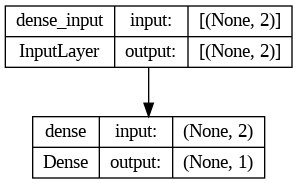

In [14]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [16]:
epochs = 100

history = model.fit(X_train, y_train, epochs = epochs, verbose = 1) # APML Homework
min_loss = min(history.history['loss']) # APML Homework
max_acc = max(history.history['accuracy']) # APML Homework
#print('\n')
#print(f'The lowest training loss after 100 epochs is: {min_loss}')
#print(f'The highest training accuracy after 100 epochs is: {max_acc}')

Epoch 1/100
50/50 [==============================] - 1s 2ms/step - loss: 0.7122 - accuracy: 0.5000
Epoch 2/100
50/50 [==============================] - 0s 1ms/step - loss: 0.7112 - accuracy: 0.4938
Epoch 3/100
50/50 [==============================] - 0s 1ms/step - loss: 0.7102 - accuracy: 0.4981
Epoch 4/100
50/50 [==============================] - 0s 2ms/step - loss: 0.7092 - accuracy: 0.4944
Epoch 5/100
50/50 [==============================] - 0s 2ms/step - loss: 0.7084 - accuracy: 0.4969
Epoch 6/100
50/50 [==============================] - 0s 2ms/step - loss: 0.7075 - accuracy: 0.4925
Epoch 7/100
50/50 [==============================] - 0s 1ms/step - loss: 0.7066 - accuracy: 0.4906
Epoch 8/100
50/50 [==============================] - 0s 1ms/step - loss: 0.7059 - accuracy: 0.4925
Epoch 9/100
50/50 [==============================] - 0s 1ms/step - loss: 0.7051 - accuracy: 0.4944
Epoch 10/100
50/50 [==============================] - 0s 2ms/step - loss: 0.7044 - accuracy: 0.4950
Epoch 11/

In [17]:
print(f'The lowest training loss after 100 epochs is: {min_loss}')
print(f'The highest training accuracy after 100 epochs is: {max_acc}')

The lowest training loss after 100 epochs is: 0.6918207406997681
The highest training accuracy after 100 epochs is: 0.59375


Take a look to the above results and to the results at Epoch 100/100. At epoch 100 my results are `training loss: 0.6918` and `train accuracy: 0.5788`. Just like homework 2, I decided to print the lowest training loss after 100 epochs and the highest training accuracy after the 100 epochs as shown above.

As I mentioned before, the 2 classes red vs blue are separable. However, the decision boundary is not linear. We know logistic regression takes on a linear decision boundary (HW3 as an example in which I plotted a decision boundary), but in this case the patterns might not match resulting in not being easily separable. I even tried experimenting with a variation of `plot_decision_boundary4` function I applied in homework 4 just to see the results. I ended up getting multiple colorful lines showing that it might involve multiple decisions as shown below. In this new submission, I decided to experiment with the `plot_decision_boundary4` function due to the comments regarding plot labelling in HW4 which cost me a couple of points.

So because we are dealing with something like this, it might be the reason why the logistic regression model might be struggling and underperforming. It struggles to correctly classify the data. Logistic Regression performs better when data is linearly separable.


In [31]:
def plot_decision_boundary4(X, y, model, steps = 1000, cmap = 'Paired', title = ''):
    cmap = plt.get_cmap(cmap)

    # Defining region of interest by dara limits
    xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1 # bound of domain
    ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1 # bound of domain
    steps = 1000
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    yhat = model.predict(np.c_[xx.ravel(), yy.ravel()]) # yhat -> predictions

   # Github: Decision boundary in region of interest
    Z = yhat.reshape(xx.shape)
    fig, ax = plt.subplots()
    ax.contourf(xx, yy, Z, cmap = cmap, alpha = 0.5)

    # Github: Get predicted labels on training data and plot
    # Respective colors to classes
    train_labels = model.predict(X)
    class_colors = ['red', 'blue']
    c = [class_colors[int(cls)] for cls in y] # assigning colors based on y labels
    scatter = ax.scatter(X[:,0], X[:,1], c=c, lw=0, label = ['Class 0', 'Class 1'], alpha = 0.8)

    # Create legend
    # matplotlib doc: marker o -> circle
    # matplotlib doc: color w -> white
    legend_elements = [Line2D([0], [0], marker = 'o', color = 'w', label = 'Class 0', markerfacecolor = 'red', markersize = 8),
                       Line2D([0], [0], marker = 'o', color = 'w', label = 'Class 1', markerfacecolor = 'blue', markersize = 8)]

    ax.legend(handles = legend_elements)
    ax.set_title(title)
    return fig, ax

63/63 [==============================] - 0s 1ms/step


(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Decision Boundary - Logistic Regression'}>)

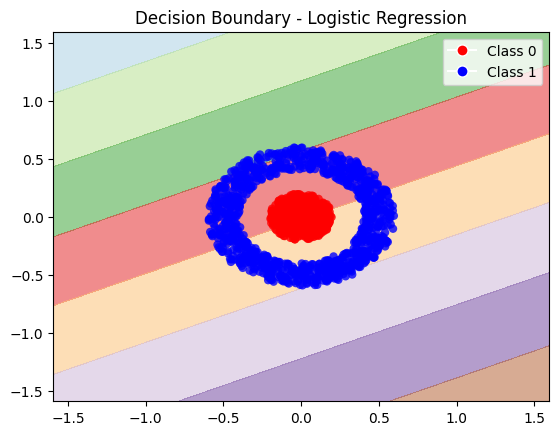

In [33]:
plot_decision_boundary4(X, y, model, title = 'Decision Boundary - Logistic Regression')

# Forward Neural Network

A Feed Forward Neural Network is an artificial Neural Network in which the nodes are connected circularly. The feed-forward model is the basic type of neural network because the input is only processed in one direction. The data always flows in one direction and never backwards/opposite.

My model architecture consist of a dense layer with 64 neurons, it has 2 input data dimensions, a ReLU activation function that will help introducing non-linearity, another dense layer which has 1 single neuron which is going to act as the output layer, and it has a Sigmoid activation function that will return values between 0 and 1. Just like the logistic regression model, we will apply binary cross entropy loss using the Adam optimizer and the accuracy metric for better results.

`Relu Activation Function` (Rectified Activation Function): With default values, this returns the standard ReLU activation: max(x, 0), the element-wise maximum of 0 and the input tensor.

$$ReLU(x) = (x)^+ = \max(0, x)$$


`Sigmoid Activation Function` Will always returns a value between 0 and 1.

$$\text{Sigmoid}(x) = \sigma(x) = \frac{1}{1 + e^{-x}}$$

The reason I decided to use this architecture was due to the nature of the data generated by gencircle() function and its binary classification task. It all depends on the task being askes, in this case being a binary classification problem. That’s why I am using an input layer, a hidden layer, and an output layer (a basic architecture).


In [34]:
# hidden layers numbers that are usually used 32, 64, 128, 256 APML
model_fw = Sequential()

model_fw.add(Dense(64, input_shape = (2,), activation = 'relu')) # ReLU activation function
model_fw.add(Dense(1, activation='sigmoid')) # Output dense layer/Sigmoid activation function

model_fw.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [35]:
model_fw.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 64)                192       
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 257 (1.00 KB)
Trainable params: 257 (1.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


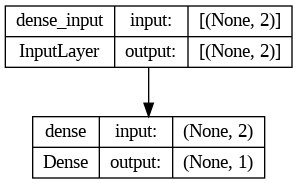

In [36]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [37]:
epochs = 100

history = model_fw.fit(X_train, y_train, epochs = epochs, verbose = 1) # APML Homework
min_loss = min(history.history['loss']) # APML Homework
max_acc = max(history.history['accuracy']) # APML Homework

Epoch 1/100
50/50 [==============================] - 1s 2ms/step - loss: 0.6761 - accuracy: 0.5512
Epoch 2/100
50/50 [==============================] - 0s 1ms/step - loss: 0.6359 - accuracy: 0.7650
Epoch 3/100
50/50 [==============================] - 0s 1ms/step - loss: 0.6028 - accuracy: 0.8763
Epoch 4/100
50/50 [==============================] - 0s 1ms/step - loss: 0.5675 - accuracy: 0.9062
Epoch 5/100
50/50 [==============================] - 0s 1ms/step - loss: 0.5273 - accuracy: 0.9750
Epoch 6/100
50/50 [==============================] - 0s 3ms/step - loss: 0.4816 - accuracy: 0.9912
Epoch 7/100
50/50 [==============================] - 0s 2ms/step - loss: 0.4341 - accuracy: 1.0000
Epoch 8/100
50/50 [==============================] - 0s 2ms/step - loss: 0.3864 - accuracy: 1.0000
Epoch 9/100
50/50 [==============================] - 0s 2ms/step - loss: 0.3412 - accuracy: 1.0000
Epoch 10/100
50/50 [==============================] - 0s 2ms/step - loss: 0.2994 - accuracy: 1.0000
Epoch 11/

In [38]:
print(f'The lowest training loss after 100 epochs is: {min_loss}')
print(f'The highest training accuracy after 100 epochs is: {max_acc}')

The lowest training loss after 100 epochs is: 0.0018570057582110167
The highest training accuracy after 100 epochs is: 1.0


63/63 [==============================] - 0s 1ms/step


(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Decision Boundary - FNN'}>)

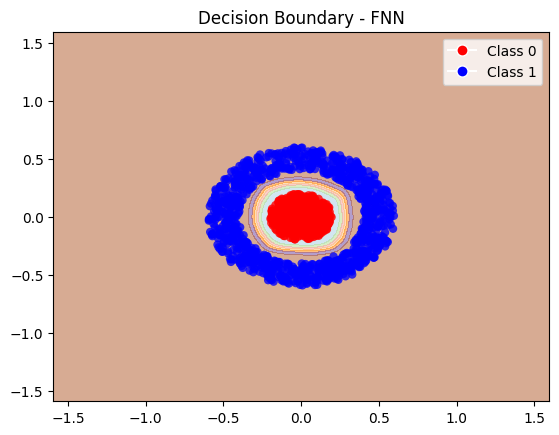

In [39]:
plot_decision_boundary4(X, y, model_fw, title = 'Decision Boundary - FNN')

I’m always skeptical regarding the losses and accuracies of a model. If we look at the results, we might think the model might be doing a much better job in comparison with the logistic regression model regarding training. It shows we are getting score of 100% for training accuracy (highest score after 100 epochs), but it might be suffering from other things like overfitting etc. Who knows? The model might be just memorizing instead of learning.

I know this Homework is just experimentation and testing our models, but we know that much more experimention and testing is needed to fully understand what’s going on here (different architecture perhaps or some other hyperparameter, regularization techniques etc). The plot shows that the model is having a hard time or some sort of issues predicting probabilities closer to 0 or 1. The multiple colors we see within the blue circle are due to the predicted probabilities (take values between 0 and 1) are close to 0 or 1 but no exactly 0 or 1.

# Forward Neural Network Experimental

 This was just to try adding another layer and reducing the number of epochs (50 epochs).

In [40]:
model_fw2 = Sequential()

model_fw2.add(Dense(64, input_shape = (2,), activation ='relu'))
model_fw2.add(Dense(32, activation='relu'))
model_fw2.add(Dense(1, activation='sigmoid'))

model_fw2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [41]:
model_fw2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                192       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2305 (9.00 KB)
Trainable params: 2305 (9.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


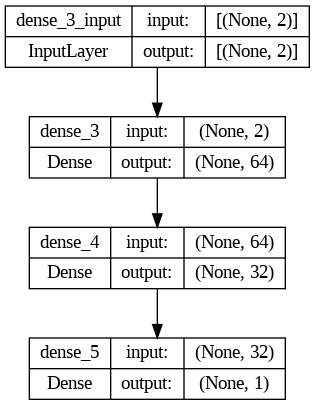

In [42]:
plot_model(model_fw2, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [43]:
epochs = 50 # changing epochs to 50 for experimental purposes

history = model_fw2.fit(X_train, y_train, epochs = epochs, verbose = 1) # APML Homework
min_loss = min(history.history['loss']) # APML Homework
max_acc = max(history.history['accuracy']) # APML Homework

Epoch 1/50
50/50 [==============================] - 1s 2ms/step - loss: 0.6321 - accuracy: 0.7300
Epoch 2/50
50/50 [==============================] - 0s 2ms/step - loss: 0.4764 - accuracy: 0.9119
Epoch 3/50
50/50 [==============================] - 0s 2ms/step - loss: 0.2815 - accuracy: 0.9987
Epoch 4/50
50/50 [==============================] - 0s 2ms/step - loss: 0.1316 - accuracy: 1.0000
Epoch 5/50
50/50 [==============================] - 0s 2ms/step - loss: 0.0625 - accuracy: 1.0000
Epoch 6/50
50/50 [==============================] - 0s 2ms/step - loss: 0.0350 - accuracy: 1.0000
Epoch 7/50
50/50 [==============================] - 0s 2ms/step - loss: 0.0223 - accuracy: 1.0000
Epoch 8/50
50/50 [==============================] - 0s 1ms/step - loss: 0.0155 - accuracy: 1.0000
Epoch 9/50
50/50 [==============================] - 0s 1ms/step - loss: 0.0114 - accuracy: 1.0000
Epoch 10/50
50/50 [==============================] - 0s 1ms/step - loss: 0.0087 - accuracy: 1.0000
Epoch 11/50
50/50 [

In [44]:
print(f'The lowest training loss after 50 epochs is: {min_loss}')
print(f'The highest training accuracy after 50 epochs is: {max_acc}')

The lowest training loss after 50 epochs is: 0.00020574673544615507
The highest training accuracy after 50 epochs is: 1.0


63/63 [==============================] - 0s 1ms/step


(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Decision Boundary - FNN(50 epochs)'}>)

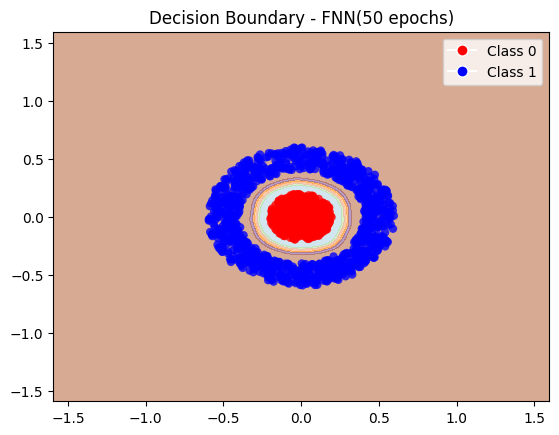

In [46]:
plot_decision_boundary4(X, y, model_fw2, title = 'Decision Boundary - FNN(50 epochs)')

Results show the similar scenario as the above FNN model with basic architecture and 100 epochs of training.

# References:

- Tutorial Keras API: https://www.marktechpost.com/2021/04/08/logistic-regression-with-keras/

- Deep Learning Principles HomeWork 2

- Feedforward Neural Network: https://www.analyticsvidhya.com/blog/2022/03/basic-introduction-to-feed-forward-network-in-deep-learning/

- Feedforward Neural Network: https://pyimagesearch.com/2021/05/06/implementing-feedforward-neural-networks-with-keras-and-tensorflow/

- Decision boundary HW4 (Decision Tree Code): https://hackernoon.com/how-to-plot-a-decision-boundary-for-machine-learning-algorithms-in-python-3o1n3w07

- xx.ravel() and yy.ravel(): https://stackoverflow.com/questions/45108464/can-someone-explain-this-line-z-clf-predict-probanp-c-xx-ravel-yy-ravel

- Keras plot_model: https://stackoverflow.com/questions/67703817/cant-import-plot-model-from-keras-utils

- Plot: https://stackoverflow.com/questions/76226587/how-to-add-a-custom-legend-along-with-default-legends

- Matplotlib: https://matplotlib.org/stable/api/markers_api.html

- Matplotlib: https://matplotlib.org/2.1.1/api/_as_gen/matplotlib.pyplot.plot.html

- Decision boundary PyTorch github: https://gist.github.com/erwan-simon/e3baef06a00bb9a39a6968acf78121ee